# 안녕하세요^^
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

* 17년도부터 21년도 까지의 데이터를 train set, 22년도의 6개월치 데이터를 test set 으로 설정합니다.

In [ ]:
import pandas as pd

In [ ]:
# 학습 데이터 로딩
train = pd.read_csv('df_total.csv', index_col=0, sep=',')
test = pd.read_csv('df_test.csv', index_col=0, sep=',')

In [ ]:
train

,기준일ID,시간대구분,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,2017-01-01,0,31535.2200,1945.4402,566.4588,631.5581,991.9184,1297.1287,1223.1529,1552.9448,...,1157.6661,1107.6781,1282.9235,1029.4360,998.0414,874.5643,1162.1547,1053.0477,964.3940,2025.4819
1,2017-01-01,1,31188.9174,1930.4766,562.1018,625.2151,1030.6281,1307.7381,1183.0956,1491.5827,...,1120.0051,1102.5198,1271.8997,1027.2574,1038.7528,857.9100,1149.7532,1042.7411,919.0115,2062.2422
2,2017-01-01,2,31240.4974,1921.1864,559.3965,658.7463,1058.7082,1311.9591,1186.2600,1537.3732,...,1103.1547,1112.4579,1282.9366,1027.8901,1020.0177,853.3890,1193.4472,1011.2073,889.9325,1960.1236
3,2017-01-01,3,31442.4314,1946.4476,566.7525,649.0804,1057.9119,1324.2638,1202.1250,1521.2732,...,1116.2165,1102.0668,1260.8472,1007.6650,1042.9554,896.0038,1163.0355,1056.6428,891.9177,2060.1872
4,2017-01-01,4,31922.7751,1953.7713,568.8845,623.2087,1063.2557,1342.9146,1209.2680,1556.0675,...,1187.5457,1120.2232,1281.2738,1064.0655,1045.2130,895.8336,1191.7017,1045.3362,874.4984,2038.6212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43507,2021-12-31,19,33060.4555,1858.2611,541.0746,605.9080,781.6602,1342.6763,1435.1080,1678.8904,...,1415.9734,1513.1706,1521.8562,1277.9546,1279.9036,977.2774,1091.7204,942.1525,789.2094,1705.8216
43508,2021-12-31,20,32360.1898,2093.8808,609.6807,612.5326,768.8351,1323.7124,1479.1382,1654.5005,...,1311.7764,1431.5813,1461.8649,1294.2541,1232.4805,918.4935,1062.8069,894.8617,792.1748,1726.3071
43509,2021-12-31,21,31417.3991,1983.6728,577.5909,639.2174,779.6693,1187.6783,1375.6785,1600.9946,...,1186.6502,1348.7581,1407.1924,1223.4195,1205.9346,908.4537,999.7321,874.9000,770.3955,1674.6047
43510,2021-12-31,22,30763.0563,2028.3314,590.5941,654.0295,790.1638,1133.6311,1362.0266,1548.7366,...,1108.3915,1260.6435,1391.1649,1213.3359,1110.3310,863.0019,991.0451,848.4622,753.9750,1727.0258


---

# 1. 데이터 전처리

#### [실습문제1] 열 추가
* 기존 '기준일ID'열에서 날짜 데이터를 추출하여 새로운 열로 추가 합니다.
    - pd.to_datetime() 함수를 사용해 '기준일ID'열을 datetime 형식으로 변경하겠습니다.
    - year, month, day 열로 기존 데이터 프레임에 연월일 정보를 저장합니다.
    - 데이터 프레임 열에 대해 날짜 정보를 얻을 때에는 **dt.year**, **dt.month**, **dt.day** 속성을 사용합니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train['기준일ID'] = pd.to_datetime(train['기준일ID'])
test['기준일ID'] = pd.to_datetime(test['기준일ID'])

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train['year'] = train['기준일ID'].dt.year
train['month'] = train['기준일ID'].dt.month
train['day'] = train['기준일ID'].dt.day
test['year'] = test['기준일ID'].dt.year
test['month'] = test['기준일ID'].dt.month
test['day'] = test['기준일ID'].dt.day

#### [실습문제2] 불필요한 열 제거 및 열 이름 변경
* df_total과 df_test에서 '총생활인구수'외에 불필요한 열을 제거 하도록 하겠습니다.
* 시간 데이터를 남기고, '시간대구분' column 을 'hour'로 rename 하도록 하겠습니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train = train[['시간대구분', 'year', 'month', 'day', '총생활인구수']]
test = test[['시간대구분', 'year', 'month', 'day', '총생활인구수']]

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train.rename(columns={'시간대구분':'hour'}, inplace=True)
test.rename(columns={'시간대구분':'hour'}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_24772\404852167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.rename(columns={'시간대구분':'hour'}, inplace=True)


In [ ]:
train = train[['year', 'month', 'day', 'hour', '총생활인구수']]
test = test[['year', 'month', 'day', 'hour', '총생활인구수']]

#### [실습문제3] 시프트 & 롤링
* shift()를 활용하여 이동할 행 수를 지정합니다.
* rolling()을 활용하여 추가할 이동평균 수를 지정합니다.

In [ ]:
train

,year,month,day,hour,총생활인구수
0,2017,1,1,0,31535.2200
1,2017,1,1,1,31188.9174
2,2017,1,1,2,31240.4974
3,2017,1,1,3,31442.4314
4,2017,1,1,4,31922.7751
...,...,...,...,...,...
43507,2021,12,31,19,33060.4555
43508,2021,12,31,20,32360.1898
43509,2021,12,31,21,31417.3991
43510,2021,12,31,22,30763.0563


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train['전날동시간대생활인구수'] = train['총생활인구수'].shift(24)
train['7일전동시간대생활인구수'] = train['총생활인구수'].shift(168)
test['전날동시간대생활인구수'] = test['총생활인구수'].shift(24)
test['7일전동시간대생활인구수'] = test['총생활인구수'].shift(168)

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train['지난24시간평균생활인구수'] = train['총생활인구수'].rolling(24).mean()
test['지난24시간평균생활인구수'] = test['총생활인구수'].rolling(24).mean()

#### [실습문제4] 결측치 처리 및 불필요한 열 제거
* 롤링 & 시프트 과정에서 발생한 결측치를 처리하도록 하겠습니다.
* 불필요한 열을 추가로 제거 하겠습니다.(시간 관련 행들)

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train = train.dropna(axis=0)
test = test.dropna(axis=0)

In [ ]:
train.head()

,year,month,day,hour,총생활인구수,전날동시간대생활인구수,7일전동시간대생활인구수,지난24시간평균생활인구수
168,2017,1,8,0,30716.3268,31385.6529,31535.2200,35310.650092
169,2017,1,8,1,30673.4813,31403.0169,31188.9174,35280.252775
170,2017,1,8,2,30535.9573,31549.9889,31240.4974,35238.001458
171,2017,1,8,3,30884.0372,31738.8546,31442.4314,35202.384067
172,2017,1,8,4,31353.9409,32380.1733,31922.7751,35159.624383


In [ ]:
test.tail()

,year,month,day,hour,총생활인구수,전날동시간대생활인구수,7일전동시간대생활인구수,지난24시간평균생활인구수
4339,2022,6,30,19,32969.6040,31689.8212,32368.9760,35370.500362
4340,2022,6,30,20,31014.6597,30425.9054,30551.3557,35395.031792
4341,2022,6,30,21,30923.2923,30352.8869,29836.6983,35418.798683
4342,2022,6,30,22,30509.5463,30232.2846,30643.8556,35430.351254
4343,2022,6,30,23,31184.8763,31251.4119,31539.6470,35427.578937


In [ ]:
df_total = train[['총생활인구수', '전날동시간대생활인구수', '7일전동시간대생활인구수', '지난24시간평균생활인구수']]
df_test = test[['총생활인구수', '전날동시간대생활인구수', '7일전동시간대생활인구수', '지난24시간평균생활인구수']]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

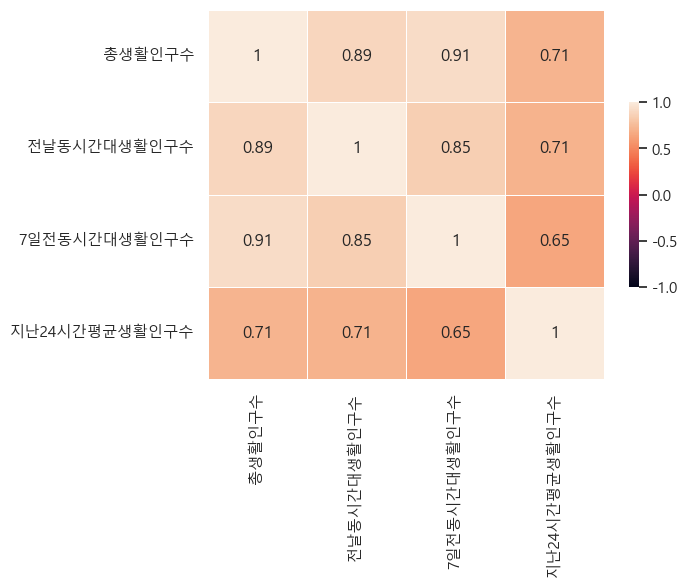

In [ ]:
# 히트맵을 그린다
sns.heatmap(df_total.corr(),
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.show()

#### [실습문제5] train, test 데이터 나누기
* df_total과 df_test를 각각 train_x, train_y, test_x, test_y 로 나누어 주세요.
* 인덱스를 리셋 해주세요.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train_x = df_total.drop(['총생활인구수'], axis=1)
train_x = train_x.reset_index()
train_x = train_x.drop(['index'], axis=1)

train_y = df_total['총생활인구수']
train_y = train_y.reset_index()
train_y = train_y.drop(['index'], axis=1)

test_x = df_test.drop(['총생활인구수'], axis=1)
test_x = test_x.reset_index()
test_x = test_x.drop(['index'], axis=1)

test_y = df_test['총생활인구수']
test_y = test_y.reset_index()
test_y = test_y.drop(['index'], axis=1)

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train_x

,전날동시간대생활인구수,7일전동시간대생활인구수,지난24시간평균생활인구수
0,31385.6529,31535.2200,35310.650092
1,31403.0169,31188.9174,35280.252775
2,31549.9889,31240.4974,35238.001458
3,31738.8546,31442.4314,35202.384067
4,32380.1733,31922.7751,35159.624383
...,...,...,...
43339,33928.2051,33980.5909,35375.132737
43340,33712.5348,33047.1323,35318.785029
43341,32144.4917,32033.9452,35288.489504
43342,32137.7017,31659.1453,35231.212612


In [ ]:
train_y

,총생활인구수
0,30716.3268
1,30673.4813
2,30535.9573
3,30884.0372
4,31353.9409
...,...
43339,33060.4555
43340,32360.1898
43341,31417.3991
43342,30763.0563


---

## 다음 단계를 위해서 데이터를 저장하겠습니다.

In [ ]:
# CSV로 저장
train_x.to_csv('train_x.csv', index = False)
train_y.to_csv('train_y.csv', index = False)
test_x.to_csv('test_x.csv', index = False)
test_y.to_csv('test_y.csv', index = False)

---